In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
week_8_df = pd.read_csv('datasets/raw/2016/Week 8 Feedback (2016, incomplete) - results.csv')
pd.options.display.max_rows = 66
week_8_df

,#,How likely is it that you would recommend the Make School Summer Academy to a friend?,location,track,Start Date (UTC),Submit Date (UTC),Network ID
0,00b836bda84e6bdbe780af97e249e59f,10,New York,summerApps,9/7/16 1:03,9/7/16 1:04,3212b7a834
1,39dde6dc0e1e375845d756fc7e39fc5f,10,San Francisco,summerIntro,9/7/16 1:03,9/7/16 1:04,f4954355aa
2,5e56b9de91670b308cb98dd2848b8739,10,New York,summerIntro,9/7/16 1:03,9/7/16 1:05,3d69ca289b
3,641081d05785b47a0f17448625da0d49,9,Sunnyvale,summerApps (4-week),9/7/16 1:04,9/7/16 1:06,261608f95d
4,c29bdd4f5678d78b450f4494e0f53c8c,3,San Francisco,summerIntro,9/7/16 1:04,9/7/16 1:11,d6672ddf6f
5,9030d8a662b39b519b2b685834413d66,10,San Francisco,summerApps,9/7/16 1:09,9/7/16 1:13,088e6f938d
6,1c07190c7caa72bf6b59cea48e1a4a97,8,San Francisco,summerApps,9/7/16 1:04,9/7/16 1:14,00f1d07a90
7,27a63d6c24710feb52c0cfdef7e01175,3,New York,summerGames,9/7/16 1:14,9/7/16 1:15,e0724aac23
8,b47b95f84547d8347119de1da5faa46d,6,Singapore,summerApps,9/7/16 1:16,9/7/16 1:21,9eeec0f9bf
9,828fafa477484f61d2ca5930fe99ad46,9,New York,summerGames,9/7/16 1:22,9/7/16 1:27,6c80fd2754


In [53]:
#CLEANING

del week_8_df['Network ID'] #deleting network ID column
del week_8_df['#'] #deleting weird hash id

week_8_df.rename(columns={'How likely is it that you would recommend the Make School Summer Academy to a friend?': 
                          'NPS Rating', 'location':'Location', 'track':'Track', 
                          'Start Date (UTC)':'Survey Start', 'Submit Date (UTC)':'Survey Submit'}, inplace=True)
week_8_df['Track'] = week_8_df['Track'].replace(['summerApps', 'summerIntro', 'summerGames','summerVR', 
                                                 'summerApps (4-week)', 'summerGames (4-week)'], 
                                                ['Apps', 'Intro', 'Games', 'VR', 'Apps', 'Games'])



week_8_df['NPS Rating'] = week_8_df['NPS Rating'].replace([10, 9, 7, 8, 6, 5, 4, 3, 2, 1],['Promoter', 'Promoter','Passive','Passive', 'Detractor', 'Detractor', 'Detractor', 'Detractor', 'Detractor', 'Detractor'])

#stripping the date, extracting the time
week_8_df['Survey Start'] = pd.to_datetime(week_8_df['Survey Start'], utc=True).dt.time
week_8_df['Survey Submit'] = pd.to_datetime(week_8_df['Survey Submit'], utc=True).dt.time
week_8_df

,NPS Rating,Location,Track,Survey Start,Survey Submit
0,Promoter,New York,Apps,01:03:00,01:04:00
1,Promoter,San Francisco,Intro,01:03:00,01:04:00
2,Promoter,New York,Intro,01:03:00,01:05:00
3,Promoter,Sunnyvale,Apps,01:04:00,01:06:00
4,Detractor,San Francisco,Intro,01:04:00,01:11:00
5,Promoter,San Francisco,Apps,01:09:00,01:13:00
6,Passive,San Francisco,Apps,01:04:00,01:14:00
7,Detractor,New York,Games,01:14:00,01:15:00
8,Detractor,Singapore,Apps,01:16:00,01:21:00
9,Promoter,New York,Games,01:22:00,01:27:00


In [54]:
##sql queries converted to pandas

#PROMOTER SCORE COUNT BY LOCATION
sf_score = week_8_df[(week_8_df['NPS Rating'] == 'Promoter') & (week_8_df['Location'] == 'San Francisco')].count()
#san_fran_score = 21
ny_score = week_8_df[(week_8_df['NPS Rating'] == 'Promoter') & (week_8_df['Location'] == 'New York')].count()
#ny_score = 7
sunny_score = week_8_df[(week_8_df['NPS Rating'] == 'Promoter') & (week_8_df['Location'] == 'Sunnyvale')].count()
#sunny_score = 10
la_score = week_8_df[(week_8_df['NPS Rating'] == 'Promoter') & (week_8_df['Location'] == 'Los Angeles')].count()
#la_score = 10
sing_score =  week_8_df[(week_8_df['NPS Rating'] == 'Promoter') & (week_8_df['Location'] == 'Singapore')].count()
#sing_score = 2

In [55]:
#TOTAL COUNT
sf_count = week_8_df[(week_8_df['Location'] == 'San Francisco')].count() #29
ny_count = week_8_df[(week_8_df['Location'] == 'New York')].count() #12
sunny_count = week_8_df[(week_8_df['Location'] == 'Sunnyvale')].count() #16
la_count = week_8_df[(week_8_df['Location'] == 'Los Angeles')].count() #3
sing_count = week_8_df[(week_8_df['Location'] == 'Singapore')].count() #5

#the majority of respondents hailed from SF

In [56]:
#PROMOTER SCORE AVERAGE
prom_score_sf = sf_score/sf_count #72%
prom_score_ny = ny_score/ny_count #58%
prom_score_sunny = sunny_score/sunny_count #62%
prom_score_la = la_score/la_count #66%
prom_score_sing = sing_score/sing_count #40%


In [57]:
#PROMOTER SCORE COUNT BY TRACK

apps_track_df = week_8_df[(week_8_df['NPS Rating'] == 'Promoter') & (week_8_df['Track'] == 'Apps')].count() #18
games_track_df =  week_8_df[(week_8_df['NPS Rating'] == 'Promoter') & (week_8_df['Track'] == 'Games')].count() #14
intro_track_df = week_8_df[(week_8_df['NPS Rating'] == 'Promoter') & (week_8_df['Track'] == 'Intro')].count() #8
vr_track_df = week_8_df[(week_8_df['NPS Rating'] == 'Promoter') & (week_8_df['Track'] == 'VR')].count() #2


In [58]:
#TRACKS COUNT
app_count = week_8_df[(week_8_df['Track'] == 'Apps')].count()
games_count = week_8_df[(week_8_df['Track'] == 'Games')].count()
intro_count = week_8_df[(week_8_df['Track'] == 'Intro')].count()
vr_count = week_8_df[(week_8_df['Track'] == 'VR')].count()


In [59]:
#PROMOTER SCORE AVERAGE BY TRACK
prom_score_apps = apps_track_df/app_count #60%
prom_score_games = games_track_df/games_count #70%
prom_score_intro = intro_track_df/intro_count #66%
prom_score_vr = vr_track_df/vr_count #66%


In [60]:
#TIME ELAPSED

# time_start = week_8_df['Survey Start']
# time_end = week_8_df['Survey Submit']
# time_elapsed = time_start - time_end
# week_8_df['Time Elapsed'] = (week_8_df['Survey Start'] - week_8_df['Survey Submit']).dt.time
# # week_8_df['Time Elapsed'] = (week_8_df['Survey Start'] - week_8_df['Survey Submit'].shift()).fillna(0)


# startTime = week_8_df.index['0']
# elapsedS = week_8_df.index - startTime
# elapsedS
# #f_test['Difference'] = df_test['first_date'] - df_test['second_date'] 

[]

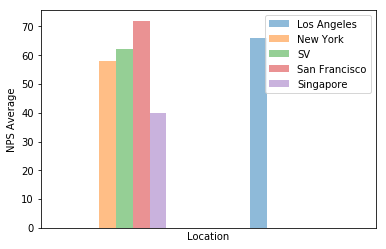

In [61]:
nps_location_ave = [{'San Francisco': 72, 'SV': 62, 'Singapore': 40, 'New York': 58}, {'Los Angeles': 66 }]
loc_df = pd.DataFrame(nps_location_ave)

ax = loc_df.plot(kind='bar', alpha=0.5)
ax.set_xlabel('Location')
ax.set_ylabel('NPS Average')
ax.set_xticks([]) 

#the most successful location in terms of NPS scoring was San Francisco

[]

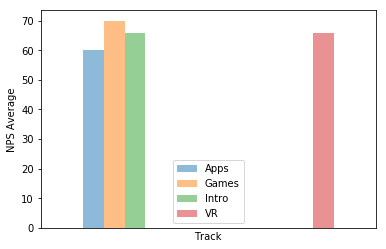

In [62]:
nps_track_ave = [{'Apps': 60, 'Games': 70, 'Intro': 66}, {'VR': 66 }]
track_df = pd.DataFrame(nps_track_ave)

ax = track_df.plot(kind='bar', alpha=0.5)
ax.set_xlabel('Track')
ax.set_ylabel('NPS Average')
ax.set_xticks([]) 

#the most successful track in terms of NPS scoring was Games

[]

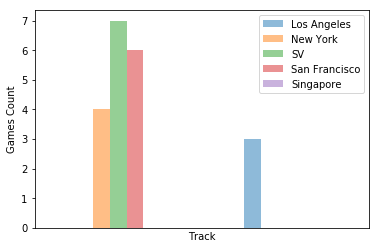

In [63]:
sf_games = week_8_df[(week_8_df["Location"] == "San Francisco") & (week_8_df["Track"] == "Games")].count() #6
la_games = week_8_df[(week_8_df["Location"] == "Los Angeles") & (week_8_df["Track"] == "Games")].count() #3
ny_games = week_8_df[(week_8_df["Location"] == "New York") & (week_8_df["Track"] == "Games")].count() #4
sing_games = week_8_df[(week_8_df["Location"] == "Singapore") & (week_8_df["Track"] == "Games")].count() #0
sv_games = week_8_df[(week_8_df["Location"] == "Sunnyvale") & (week_8_df["Track"] == "Games")].count() #7

games_nps_track_ave = [{'San Francisco': 6, 'SV': 7, 'Singapore': 0, 'New York': 4}, {'Los Angeles': 3 }]
games_track_df = pd.DataFrame(games_nps_track_ave)

ax = games_track_df.plot(kind='bar', alpha=0.5)
ax.set_xlabel('Track')
ax.set_ylabel('Games Count')
ax.set_xticks([]) 

#the most successful location based on NPS rating of the games track was Sunnyvale